In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
df = pd.read_csv('driver-data.csv')
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
id                      4000 non-null int64
mean_dist_day           4000 non-null float64
mean_over_speed_perc    4000 non-null int64
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,4000.0,3.423312e+09,1154.844867,3.423310e+09,3.423311e+09,3.423312e+09,3.423313e+09,3.423314e+09
mean_dist_day,4000.0,7.604152e+01,53.469563,1.552000e+01,4.524750e+01,5.333000e+01,6.563250e+01,2.447900e+02
mean_over_speed_perc,4000.0,1.072100e+01,13.708543,0.000000e+00,4.000000e+00,6.000000e+00,9.000000e+00,1.000000e+02


In [5]:
from sklearn.cluster import KMeans

In [6]:
kmeans = KMeans(n_clusters = 2)
df_analyze = df.drop('id', axis = 1)

In [7]:
kmeans.fit(df_analyze)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
kmeans.cluster_centers_

array([[180.017075  ,  18.29      ],
       [ 50.04763437,   8.82875   ]])

In [9]:
print(kmeans.labels_)
print(len(kmeans.labels_))

[1 1 1 ... 0 0 0]
4000


In [10]:
print(type(kmeans.labels_))
unique, counts = np.unique(kmeans.labels_, return_counts = True)
print(dict(zip(unique, counts)))

<class 'numpy.ndarray'>
{0: 800, 1: 3200}


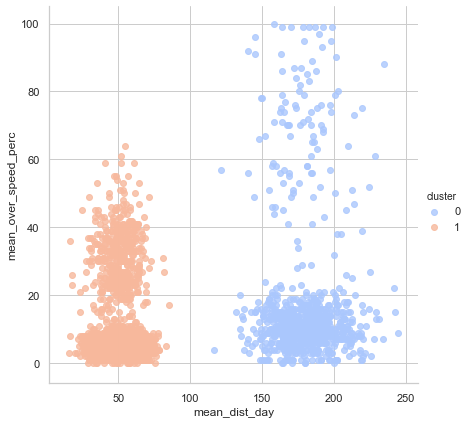

In [11]:
df_analyze['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day','mean_over_speed_perc', data = df_analyze, hue = 'cluster', 
           palette = 'coolwarm', size = 6, aspect = 1,fit_reg = False)

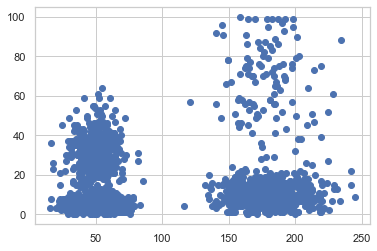

In [12]:
plt.scatter(df_analyze['mean_dist_day'], df_analyze['mean_over_speed_perc'])

In [13]:
kmeans_4 = KMeans(n_clusters = 4)
kmeans_4.fit(df.drop('id', axis = 1))
print(kmeans_4.cluster_centers_)
unique, counts = np.unique(kmeans_4.labels_, return_counts = True)

kmeans_4.cluster_centers_
print(dict(zip(unique, counts)))

[[ 49.99263253   5.20447169]
 [180.34311782  10.52011494]
 [177.83509615  70.28846154]
 [ 50.40482436  32.36533958]]
{0: 2773, 1: 696, 2: 104, 3: 427}


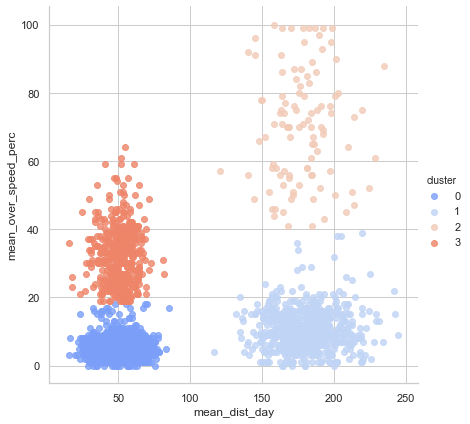

In [14]:
# plot the data 
df_analyze['cluster'] = kmeans_4.labels_
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day','mean_over_speed_perc',data=df_analyze, hue='cluster',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)